## Feature Selection Assignment

In [1]:
#Use our app_usage.csv data set

# read in app_usage data into vpn_df
import pandas as pd

#use pd.read_csv()  to creat vpn_df
#####################################
#######Type your code here########### 
#####################################

In [2]:
#try linear model first


#Create input X and output y 
#####################################
#######Type your code here########### 
#####################################

from sklearn import linear_model

#create a linear regression model from linear_model package 
model=linear_model.LinearRegression()

#Train the model with our data (X, y)
model.fit(X,y)

#Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))

Intercept: 
 168.768682735
Coefficients: 
 [ 0.78030166  0.02552479 -0.3614915  -0.22380617 -0.14305536 -0.02601244
 -0.14498212 -0.01503002  0.02986555  0.32726658]
R_squared: 
 0.93928477597


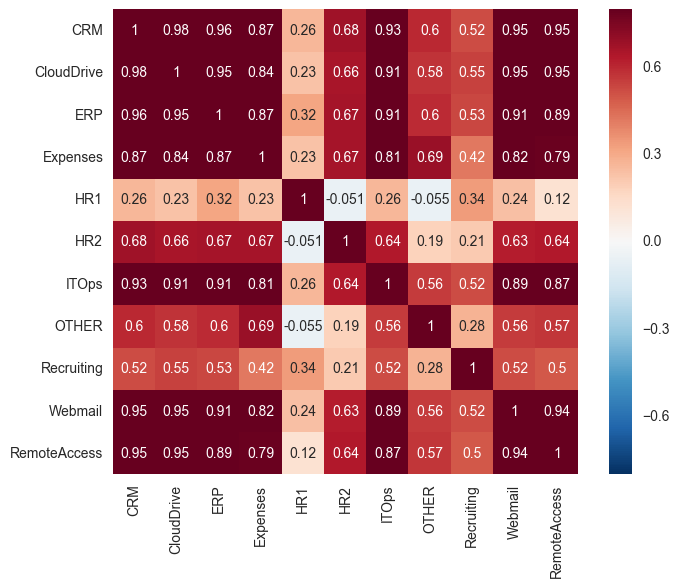

In [3]:
#Observe the heat map of correlation matrix 

#Create correlation heat map 
#Follow the example in the lecture
#####################################
#######Type your code here########### 
#####################################



In [4]:
# we know that severl features have high correlation to each other
# our feature selection will have two parts
# 1. Remove features with high correlection to each other
# 2. Use Lasso to further reduce the number of features 

In [5]:
#1. Obeserve correlation matrix


# Remove features 'CloudDrive','ERP', 'ITOps', 'Webmail' from X
# use vpn_df.drop()
#####################################
#######Type your code here########### 
#####################################


print(X.head(3))

   CRM  Expenses  HR1  HR2  OTHER  Recruiting
0   49        38    0    0    144          33
1  107        54    0    0    188          30
2  639       216    0    0   1175         297


In [8]:
#2. Try linear regression model on all features
y = y_train
X = train.drop('RemoteAccess', 1)

from sklearn import linear_model

#create a linear regression model from linear_model package 
model=linear_model.LinearRegression()

#Train the model with our data (X, y)
model.fit(X,y)

#Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))

Intercept: 
 182.864612388
Coefficients: 
 [ 0.88496568 -0.10986273 -0.05368618 -0.34929106 -0.18982413 -0.07058272
  0.0978837  -0.07120461  0.02308744  0.324002  ]
R_squared: 
 0.948016641443


In [7]:
#3. split training testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(vpn_df, train_size = 0.8)

#Create input X_train, y_train, X_test, y_test
#Remove features 'CloudDrive','ERP', 'ITOps', 'Webmail' from X_train and X_test
#####################################
#######Type your code here########### 
#####################################


In [11]:
#4. Try Lasso on training data

from sklearn.linear_model import Lasso
model=Lasso(alpha=0.3,normalize=True, max_iter=1e5)

#Train the model with our data (X, y)
model.fit(X_train,y_train)
print("R_Sqaured: \t", model.score(X_train,y_train))
print("Parameters: \t", model.coef_)

R_Sqaured: 	 0.937922555338
Parameters: 	 [ 0.95493063 -0.3367147  -0.13941593 -0.01406428 -0.03678527  0.0229252 ]


In [15]:
#5. Keep 3 features and find the best R_squared
#   Fine tune the Lasso parameter alpha to create a model
#   that has 3 parameters only
#   the model should have the best/lowest R_squared value



import numpy as np 

# initialize the best_alpha to 10
best_alpha = 10 

# initialize the best model using alpha=10
best_model = Lasso(alpha=10,normalize=True, max_iter=1e5)

# initialize the best score 
# model.score(X,y) returns R_squared 
best_score = best_model.score(X_train,y_train)

for alpha in np.linspace(10,0.1, 10000):
    #create a linear regression model from linear_model package 
    model=Lasso(alpha=alpha,normalize=True, max_iter=1e5)

    #Train the model with our data (X, y)
    model.fit(X_train,y_train)

    #Find the number of features with non-zero parameters
    number_of_nonzero_parameters = sum( abs(i)>0 for i in model.coef_)
     
    #Find a model with 3 non-zero parameters
    #and with the lowest R_squared
    #update the best models, alpha, and parameters
    #####################################
    #######Type your code here########### 
    #####################################
            

print("Best R_Square:\t",best_score)
print("Best alpha: \t", best_alpha)
print("Parameters: \t", best_model.coef_)

Best R_Square:	 0.920570396132
Best alpha: 	 0.90099009901
Parameters: 	 [ 0.80325184 -0.         -0.09127539  0.         -0.          0.00613742]


In [16]:
#6. Take test data in and calulate R_square
mean_square_error_train = ((y_train-best_model.predict(X_train))**2).sum()/y_train.shape[0]

#calculate mean_square_error_test
#####################################
#######Type your code here########### 
#####################################



In [51]:
#print out the mean square errors and 
#examine if they are close
print(mean_square_error_train)
print(mean_square_error_test)

4735.803628818616
4488.429753678578
